<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Detec%C3%A7%C3%A3o_Fraudes_Mapas_Auto_Oranizaveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

In [0]:
base = pd.read_csv('/content/sample_data/original.csv')
base = base.dropna()
base.loc[base.age < 0, 'age'] = base.age.mean()

In [0]:
X = base.iloc[:, 0: 4].values
y = base.iloc[:, 4].values
normalizador = MinMaxScaler(feature_range = (0, 1))
X = normalizador.fit_transform(X)

In [0]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)#pegando sigma e learning rate default
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

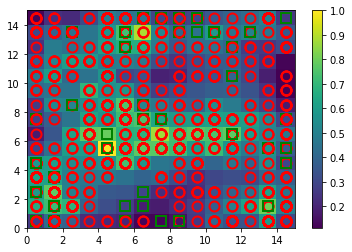

In [5]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
color = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
        markerfacecolor = 'None', markersize = 10,
        markeredgecolor = color[y[i]], markeredgewidth = 2)#posiciona o simbolo no meio do quadrado


In [0]:
mapeamento = som.win_map(X)
suspeitos = np.concatenate((mapeamento[(13, 9)], mapeamento[(1, 10)]), axis = 0)
suspeitos = normalizador.inverse_transform(suspeitos)

classe = []
for i in range(len(base)):
  for j in range(len(suspeitos)):
    if base.iloc[i, 0] == int(round(suspeitos[j, 0])):
      classe.append(base.iloc[i, 4])
      break
classe = np.asarray(classe)

In [7]:
suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]
suspeitos_final

array([[4.00000000e+00, 4.27095342e+04, 4.57519724e+01, 6.10364226e+03,
        0.00000000e+00],
       [4.70000000e+01, 4.18969716e+04, 4.72507310e+01, 4.89220973e+03,
        0.00000000e+00],
       [1.08500000e+03, 3.29218486e+04, 4.37330527e+01, 2.55321278e+03,
        0.00000000e+00],
       [1.13600000e+03, 3.04516362e+04, 4.21971367e+01, 4.75420592e+02,
        0.00000000e+00],
       [1.16200000e+03, 2.84517056e+04, 4.16010754e+01, 1.04285038e+03,
        0.00000000e+00],
       [1.17200000e+03, 3.00372031e+04, 3.86849202e+01, 1.24701279e+03,
        0.00000000e+00],
       [1.18800000e+03, 2.82228789e+04, 4.03313678e+01, 6.13240620e+02,
        0.00000000e+00],
       [1.22800000e+03, 3.12333078e+04, 4.17040518e+01, 1.66245362e+03,
        0.00000000e+00],
       [1.29500000e+03, 3.22822518e+04, 4.26349559e+01, 3.34594196e+03,
        0.00000000e+00],
       [1.32200000e+03, 3.69703604e+04, 3.37045991e+01, 1.26850638e+03,
        0.00000000e+00],
       [1.39500000e+03, 3.5243